<a href="https://colab.research.google.com/github/Jmarsaki/trabajo_evaluativo_191022/blob/main/Examen_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![imagen.png](attachment:imagen.png)

<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T10%20-%201%20-%20Analisis%20de%20Componentes%20Principales-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Consignas:
# Analizar y resolver
# # Subir a repositorio de Github, con al menos un pull request, y devolver el link

# Hacer un fork de este repositorio y trabajar sobre ese archivo


1- Generar un set de datos, con al menos 4 predictores

2- Dado el siguiente código indicar que tipo de problema instanta resolver. 

3- Evaluar los resultados.

4- Agregar otro algoritmo para resolver sobre el mismo set de datos.


#El problema a resolver requiere una máquina de vector de soporte o SVM



Se importan las librerias

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Para generar los datos usaremos las funciones provistas en sklearn

sklearn.datasets: Datasets


se cargan los datos correspondientes

In [ ]:
# Datos
# ==============================================================================
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/' \
       + 'Estadistica-machine-learning-python/master/data/ESL.mixture.csv'



In [ ]:
datos = pd.read_csv(url)
datos.head(200)

,X1,X2,y
0,2.526093,0.321050,0
1,0.366954,0.031462,0
2,0.768219,0.717486,0
3,0.693436,0.777194,0
4,-0.019837,0.867254,0
...,...,...,...
195,0.256750,2.293605,1
196,1.925173,0.165053,1
197,1.301941,0.992200,1
198,0.008131,2.242264,1


In [ ]:
datos.describe()

,X1,X2,y
count,200.000000,200.000000,200.000000
mean,0.784672,0.756016,0.500000
std,1.297582,1.026442,0.501255
min,-2.520820,-1.999853,0.000000
25%,-0.071465,0.095555,0.000000
50%,0.859702,0.861387,0.500000
75%,1.543438,1.435275,1.000000
max,4.170746,2.855805,1.000000


Se realiza la división de datos correspondiente

In [ ]:
# División de los datos en train y test
# ==============================================================================
X = datos.drop(columns = 'y')
y = datos['y']
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


Se crea y grafica el modelo máquina de vector de soporte 

In [ ]:
# Creación del modelo SVM lineal
# ==============================================================================
modelo = SVC(C = 100, kernel = 'linear', random_state=123)
modelo.fit(X_train, y_train)

SVC(C=100, kernel='linear', random_state=123)

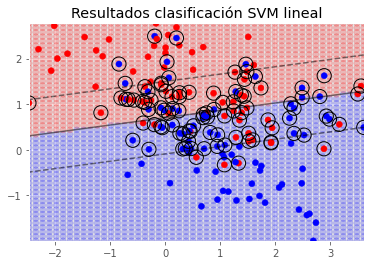

In [ ]:
# Representación gráfica de los límites de clasificación
# ==============================================================================
# Grid de valores
x = np.linspace(np.min(X_train.X1), np.max(X_train.X1), 50)
y = np.linspace(np.min(X_train.X2), np.max(X_train.X2), 50)
Y, X = np.meshgrid(y, x)
grid = np.vstack([X.ravel(), Y.ravel()]).T

# Predicción valores grid
pred_grid = modelo.predict(grid)

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(grid[:,0], grid[:,1], c=pred_grid, alpha = 0.2)
ax.scatter(X_train.X1, X_train.X2, c=y_train, alpha = 1)

# Vectores soporte
ax.scatter(
    modelo.support_vectors_[:, 0],
    modelo.support_vectors_[:, 1],
    s=200, linewidth=1,
    facecolors='none', edgecolors='black'
)

# Hiperplano de separación
ax.contour(
    X,
    Y,
    modelo.decision_function(grid).reshape(X.shape),
    colors = 'k',
    levels = [-1, 0, 1],
    alpha  = 0.5,
    linestyles = ['--', '-', '--']
)

ax.set_title("Resultados clasificación SVM lineal");

Se aplican lan métricas correspondientes

Con test de predicción y se calcula la accuracy del modelo

In [ ]:
# Predicciones test
# ==============================================================================
predicciones = modelo.predict(X_test)
predicciones


array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0])

In [ ]:
# Error de test (rmse)
# ==============================================================================

rmse = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones,
        squared = False
       )
rmse

0.5477225575051661

In [ ]:
# Accuracy de test del modelo 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 70.0%


#Problema resuelto desde modelo de árbol de desición clasificador


Ahora se aplica otro algoritmo a la resolución del modelo

Se importan las librerias correspondientes

In [ ]:
# Tratamiento de datos
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.metrics import mean_squared_error

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('once')

Se cargan los datos y se extrae información de ellos

In [ ]:
# Datos
# ==============================================================================
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/' \
       + 'Estadistica-machine-learning-python/master/data/ESL.mixture.csv'

In [ ]:
datos = pd.read_csv(url)
datos.head(200)

,X1,X2,y
0,2.526093,0.321050,0
1,0.366954,0.031462,0
2,0.768219,0.717486,0
3,0.693436,0.777194,0
4,-0.019837,0.867254,0
...,...,...,...
195,0.256750,2.293605,1
196,1.925173,0.165053,1
197,1.301941,0.992200,1
198,0.008131,2.242264,1


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      200 non-null    float64
 1   X2      200 non-null    float64
 2   y       200 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 4.8 KB


In [ ]:
datos.describe()

,X1,X2,y
count,200.000000,200.000000,200.000000
mean,0.784672,0.756016,0.500000
std,1.297582,1.026442,0.501255
min,-2.520820,-1.999853,0.000000
25%,-0.071465,0.095555,0.000000
50%,0.859702,0.861387,0.500000
75%,1.543438,1.435275,1.000000
max,4.170746,2.855805,1.000000


Se dividen los datos para el testeo y el train y se crea y representa el modelo

In [ ]:
# División de los datos en train y test
# ==============================================================================
X = datos.drop(columns = 'y')
y = datos['y']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 123,
                                        shuffle      = True
                                    )

# Clasificación
# ==============================================================================
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
X , y

(           X1        X2
 0    2.526093  0.321050
 1    0.366954  0.031462
 2    0.768219  0.717486
 3    0.693436  0.777194
 4   -0.019837  0.867254
 ..        ...       ...
 195  0.256750  2.293605
 196  1.925173  0.165053
 197  1.301941  0.992200
 198  0.008131  2.242264
 199 -0.196246  0.551404
 
 [200 rows x 2 columns], 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 195    1
 196    1
 197    1
 198    1
 199    1
 Name: y, Length: 200, dtype: int64)

Se crea el modelo y se analizan los predictores

In [ ]:
# Creación del modelo
# ==============================================================================
modelo = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 123
        )             
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
# ==============================================================================
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')

tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
5,X2,y,0.535084,0.535084
7,y,X2,0.535084,0.535084
1,X1,X2,-0.409068,0.409068
3,X2,X1,-0.409068,0.409068
2,X1,y,-0.267677,0.267677
6,y,X1,-0.267677,0.267677


Se visualiza el árbol y se aplican las métricas de error y precisión

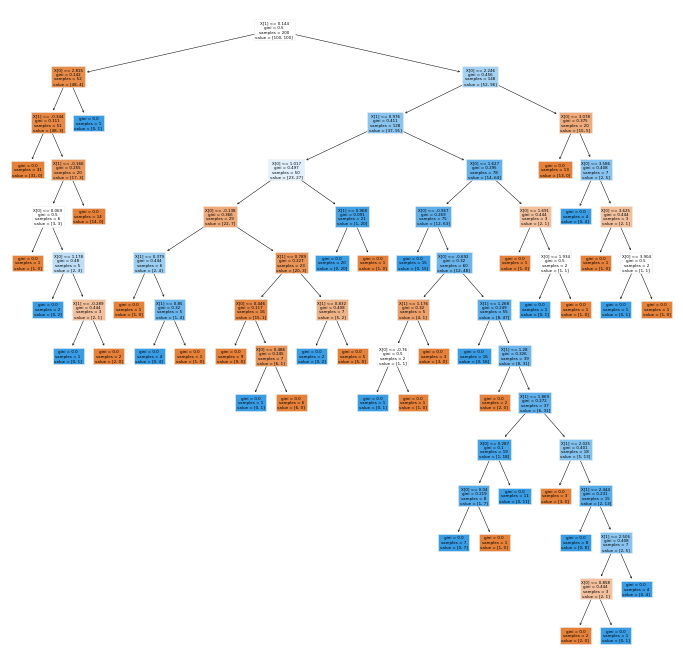

Profundidad del árbol: 13
Número de nodos terminales: 39


In [ ]:
# Visualización del árbol creado
# ==============================================================================
plt.figure(figsize=(12,12))  
tree.plot_tree(clf, filled=True)
plt.show()

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")


In [ ]:
# neg_root_mean_squared_error de test
# ==============================================================================

rmse = mean_squared_error(
        y_true = y_test,
        y_pred = predicciones,
        squared = False
       )
rmse

0.5

In [ ]:
# Clasificación predicha
# ==============================================================================
clasificacion = np.where(predicciones<0.5, 0, 1)
clasificacion

# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    clasificacion,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,10,11
1,11,8


In [ ]:
# Accuracy de test del modelo 
# ==============================================================================
clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)
print(f"El accuracy de test es: {100*accuracy}%")

El accuracy de test es: 70.0%


#Otro diseño de modelo de Decisión tree de clasificación

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn import tree

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Datos
# ==============================================================================
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/' \
       + 'Estadistica-machine-learning-python/master/data/ESL.mixture.csv'

In [ ]:
datos = pd.read_csv(url)
datos.head(200)

,X1,X2,y
0,2.526093,0.321050,0
1,0.366954,0.031462,0
2,0.768219,0.717486,0
3,0.693436,0.777194,0
4,-0.019837,0.867254,0
...,...,...,...
195,0.256750,2.293605,1
196,1.925173,0.165053,1
197,1.301941,0.992200,1
198,0.008131,2.242264,1


In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      200 non-null    float64
 1   X2      200 non-null    float64
 2   y       200 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 4.8 KB


In [ ]:
# División de los datos en train y test
# ==============================================================================
X = datos.drop(["y"], axis=1)
y = datos["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
# Creación del modelo
# ==============================================================================
modelo = DecisionTreeClassifier(
            max_depth         = 5,
            criterion         = 'gini',
            random_state      = 123
        )     

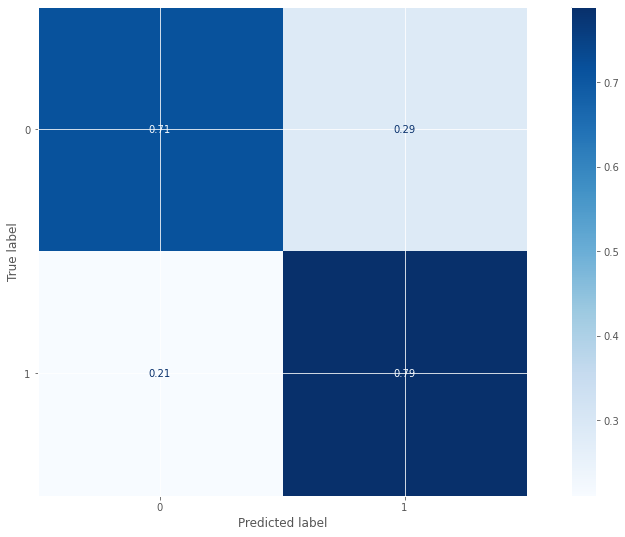

In [ ]:
matriz = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
plt.show(matriz)
plt.show()

In [ ]:
# Clasificación predicha
# ==============================================================================
clasificacion = np.where(predicciones<0.5, 0, 1)
clasificacion

# Matriz de confusión de las predicciones de test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    clasificacion,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,10,11
1,11,8


[Text(0.447463768115942, 0.9615384615384616, 'X[1] <= 0.548\ngini = 0.5\nsamples = 160\nvalue = [79, 81]'),
 Text(0.15942028985507245, 0.8846153846153846, 'X[1] <= -0.302\ngini = 0.278\nsamples = 60\nvalue = [50, 10]'),
 Text(0.13043478260869565, 0.8076923076923077, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(0.18840579710144928, 0.8076923076923077, 'X[0] <= 1.217\ngini = 0.415\nsamples = 34\nvalue = [24, 10]'),
 Text(0.057971014492753624, 0.7307692307692307, 'X[1] <= -0.166\ngini = 0.172\nsamples = 21\nvalue = [19, 2]'),
 Text(0.028985507246376812, 0.6538461538461539, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.08695652173913043, 0.6538461538461539, 'X[1] <= 0.392\ngini = 0.095\nsamples = 20\nvalue = [19, 1]'),
 Text(0.057971014492753624, 0.5769230769230769, 'gini = 0.0\nsamples = 15\nvalue = [15, 0]'),
 Text(0.11594202898550725, 0.5769230769230769, 'X[0] <= 0.446\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.08695652173913043, 0.5, 'gini = 0.0\nsamples = 4\nval

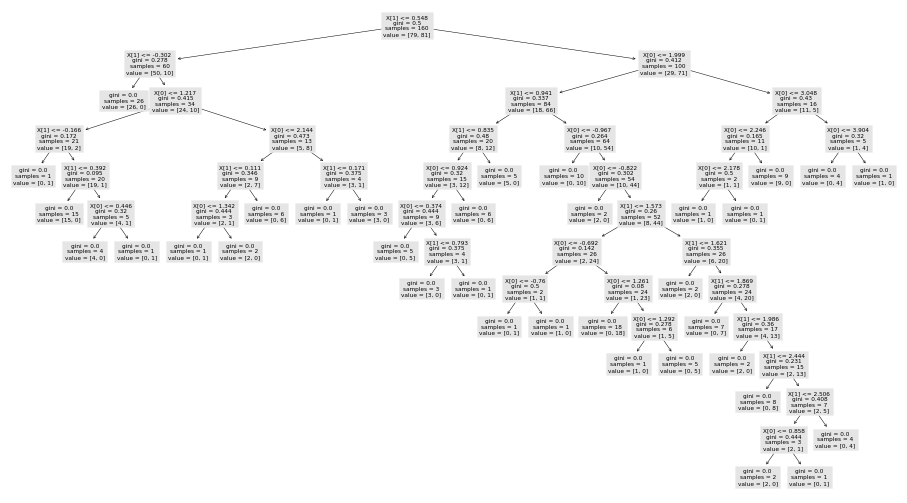

In [ ]:
# Visualización de como se tomaron las decisiones para clasificar dentro del árbol.
# ==============================================================================
tree.plot_tree(clf) 

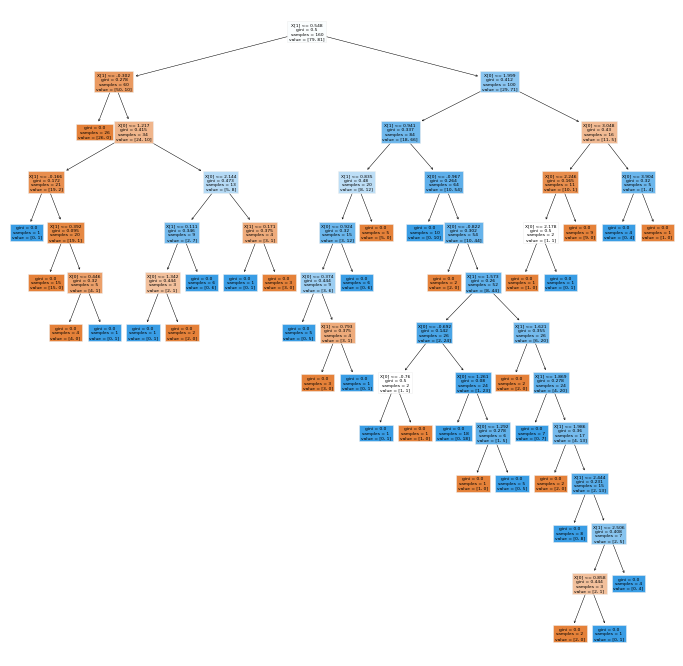

Profundidad del árbol: 12
Número de nodos terminales: 34


In [ ]:
# Visualización del árbol creado
# ==============================================================================
plt.figure(figsize=(12,12))  
tree.plot_tree(clf, filled=True)
plt.show()

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

In [ ]:
# Error de test del modelo 
#-------------------------------------------------------------------------------
predicciones = clf.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.5


In [ ]:
# Cálculo de la precisión
# ==============================================================================

clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.75

Como conclusión, se puede decir que, según lo que dicen las métricas elegidas: el error rmse y la acuracy; el rendimiento de ambos tipos de modelos de clasifición es similar, aunque los valores juegan minimamente a favor del de árbol clasificación que el de ma máquna de vector de soporte.





































